In [69]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [70]:
ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2024-12-31'

In [71]:
aapl_data = yf.download(ticker, start=start_date, end=end_date)
print(aapl_data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  179.076584  179.932572  174.845898  174.963959  104487900
2022-01-04  176.803818  179.991605  176.233164  179.686603   99310400
2022-01-05  172.100830  177.266216  171.825344  176.715244   94537600
2022-01-06  169.227921  172.474738  168.873722  169.916636   96904000
2022-01-07  169.395187  171.333439  168.273561  170.103585   86709100
...                ...         ...         ...         ...        ...
2024-12-23  255.270004  255.649994  253.449997  254.770004   40858800
2024-12-24  258.200012  258.209991  255.289993  255.490005   23234700
2024-12-26  259.019989  260.100006  257.630005  258.190002   27237100
2024-12-27  255.589996  258.700012  253.059998  257.829987   42355300
2024-12-30  252.199997  253.500000  250.750000  252.229996   35557500

[752 rows x 5 colum

In [72]:
print(aapl_data.head())


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  179.076584  179.932572  174.845898  174.963959  104487900
2022-01-04  176.803818  179.991605  176.233164  179.686603   99310400
2022-01-05  172.100830  177.266216  171.825344  176.715244   94537600
2022-01-06  169.227921  172.474738  168.873722  169.916636   96904000
2022-01-07  169.395187  171.333439  168.273561  170.103585   86709100


In [73]:
print(aapl_data.tail())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-12-23  255.270004  255.649994  253.449997  254.770004  40858800
2024-12-24  258.200012  258.209991  255.289993  255.490005  23234700
2024-12-26  259.019989  260.100006  257.630005  258.190002  27237100
2024-12-27  255.589996  258.700012  253.059998  257.829987  42355300
2024-12-30  252.199997  253.500000  250.750000  252.229996  35557500


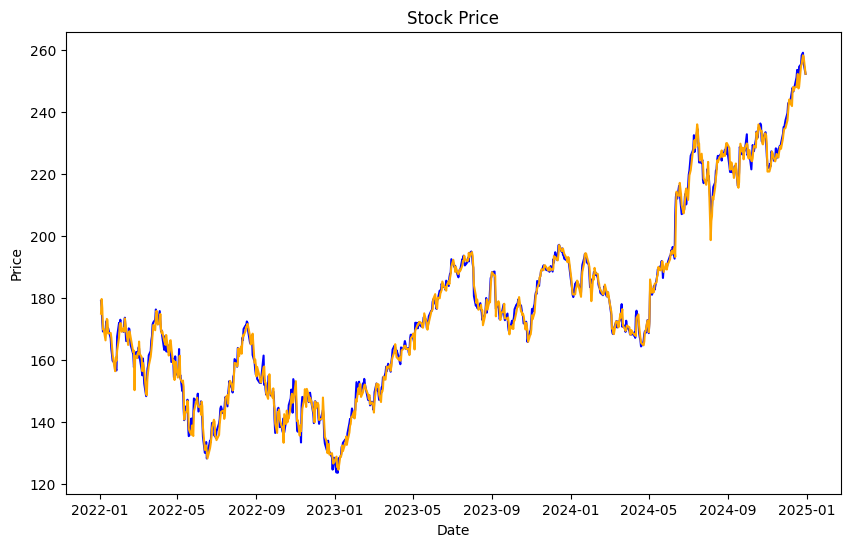

In [74]:
plt.figure(figsize=(10,6))
plt.plot(aapl_data['Close'], label='Close Price', color ='blue')
plt.plot(aapl_data['Open'], label = 'Open Price', color = 'orange')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [75]:
#Check Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(aapl_data['Close'])
print("ADF Statics :",result[0])
print ("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary")
else:
    print("The data is not stationary. Differencing required.")

ADF Statics : -0.09046259310519206
p-value : 0.9503802492071914
The data is not stationary. Differencing required.


In [76]:
#Differencing
aapl_data['Close_differencing']=aapl_data['Close'].diff().dropna()
#Checking data is stationary or not
result= adfuller(aapl_data['Close_differencing'].dropna())
print("ADF Statics :",result[1])
print("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing might be required.")

ADF Statics : 0.0
p-value : 0.0
The data is stationary.


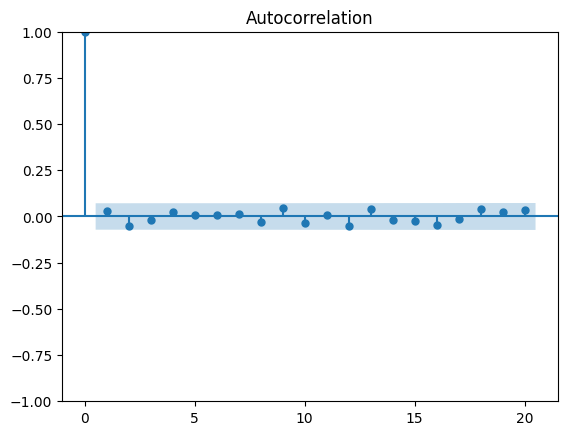

In [77]:
#Autocorrelation and Partial Autocorrelation
plot_acf(aapl_data["Close_differencing"].dropna(),lags=20)
plt.show()


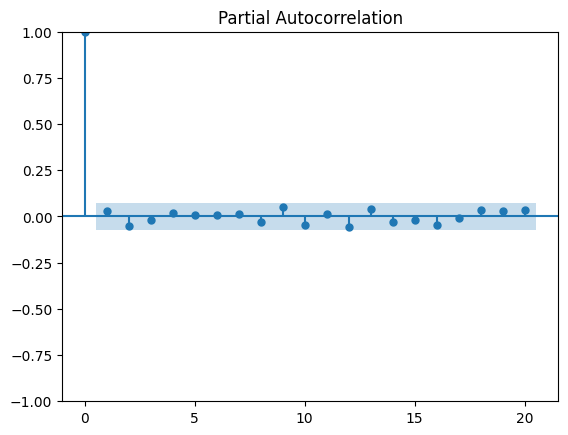

In [78]:
plot_pacf(aapl_data["Close_differencing"].dropna(),lags=20)
plt.show()

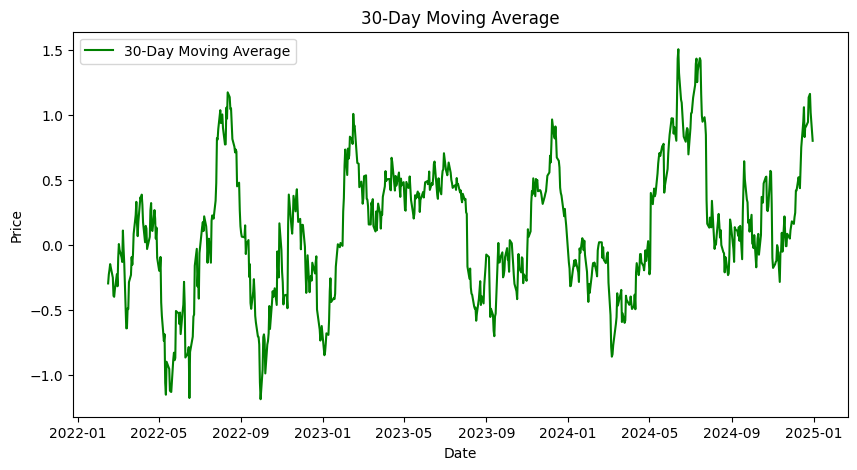

In [79]:
#Calculate 30 day Moving Average
aapl_data['30_day_MA'] = aapl_data['Close_differencing'].rolling(window=30).mean()

#Plotting the Moving Average
plt.figure(figsize=(10,5))
plt.plot(aapl_data['30_day_MA'],label ='30-Day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day Moving Average')
plt.legend()
plt.show()

In [80]:
#Fitting the ARIMA Model
model = ARIMA(aapl_data['Close'], order=(7,1,5))
arima_result = model.fit()
print(arima_result.summary())

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  752
Model:                 ARIMA(7, 1, 5)   Log Likelihood               -1844.413
Date:                Thu, 02 Jan 2025   AIC                           3714.826
Time:                        22:44:54   BIC                           3774.905
Sample:                             0   HQIC                          3737.974
                                - 752                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6520      1.372     -0.475      0.635      -3.340       2.036
ar.L2          0.3024      0.573      0.528      0.598      -0.820       1.425
ar.L3         -0.5827      0.687     -0.849      0.3

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
start_date = pd.to_datetime("2024-11-1")
end_date = pd.to_datetime("2024-12-30")


In [82]:
#Check if the dates are within the range of the index
if start_date not in aapl_data.index or end_date not in aapl_data.index:
    print(f"The start_date or end_date is not found in the aapl_data's index. Availabe dates are:")
    print(aapl_data.index.min(), "to", aapl_data.index.max())
else:
    predicted_data = arima_result.predict(start=start_date, end=end_date,typ="level")
    print(aapl_data['Close'].tail(10))
    print("\n Predicted Data")
    print(predicted_data)
    

Ticker            AAPL
Date                  
2024-12-16  251.039993
2024-12-17  253.479996
2024-12-18  248.050003
2024-12-19  249.789993
2024-12-20  254.490005
2024-12-23  255.270004
2024-12-24  258.200012
2024-12-26  259.019989
2024-12-27  255.589996
2024-12-30  252.199997

 Predicted Data
Date
2024-11-01    224.806002
2024-11-04    222.687256
2024-11-05    221.625832
2024-11-06    223.979858
2024-11-07    222.489086
2024-11-08    227.860170
2024-11-11    226.197490
2024-11-12    223.876460
2024-11-13    223.969169
2024-11-14    225.416664
2024-11-15    228.407399
2024-11-18    225.296420
2024-11-19    228.262864
2024-11-20    228.199335
2024-11-21    228.459901
2024-11-22    228.322002
2024-11-25    229.873782
2024-11-26    233.118431
2024-11-27    235.450941
2024-11-29    234.839701
2024-12-02    237.681687
2024-12-03    239.100065
2024-12-04    242.635533
2024-12-05    242.514222
2024-12-06    243.391609
2024-12-09    242.935324
2024-12-10    247.495897
2024-12-11    247.422832
20

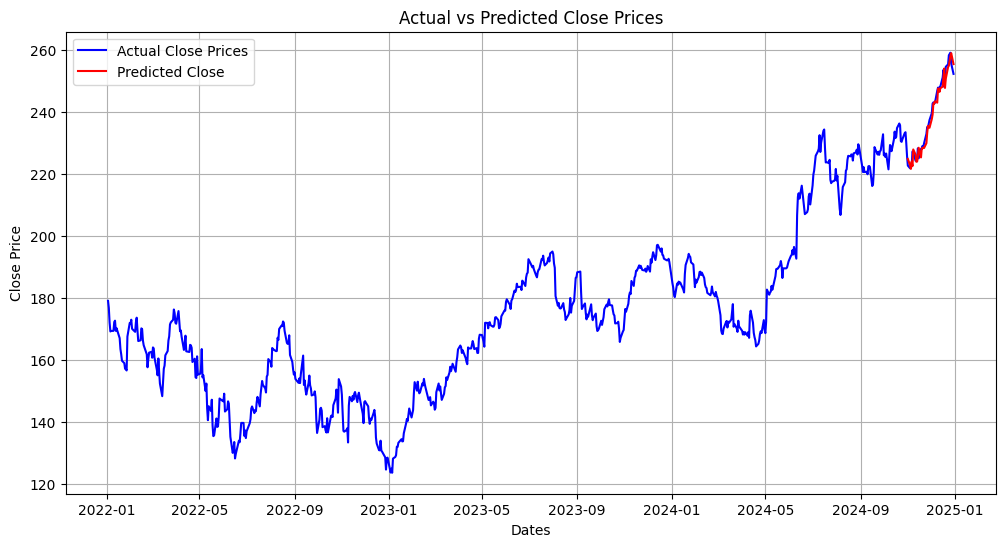

In [83]:
#Plot Actual and Predicted Data
plt.figure(figsize=(12,6))
plt.plot(aapl_data.index,aapl_data['Close'],label ='Actual Close Prices',color='blue')
plt.plot(predicted_data.index,predicted_data, label = 'Predicted Close', color='red')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
#Forecast next 30 days
forecast_steps =30
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=aapl_data.index[-1] +pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


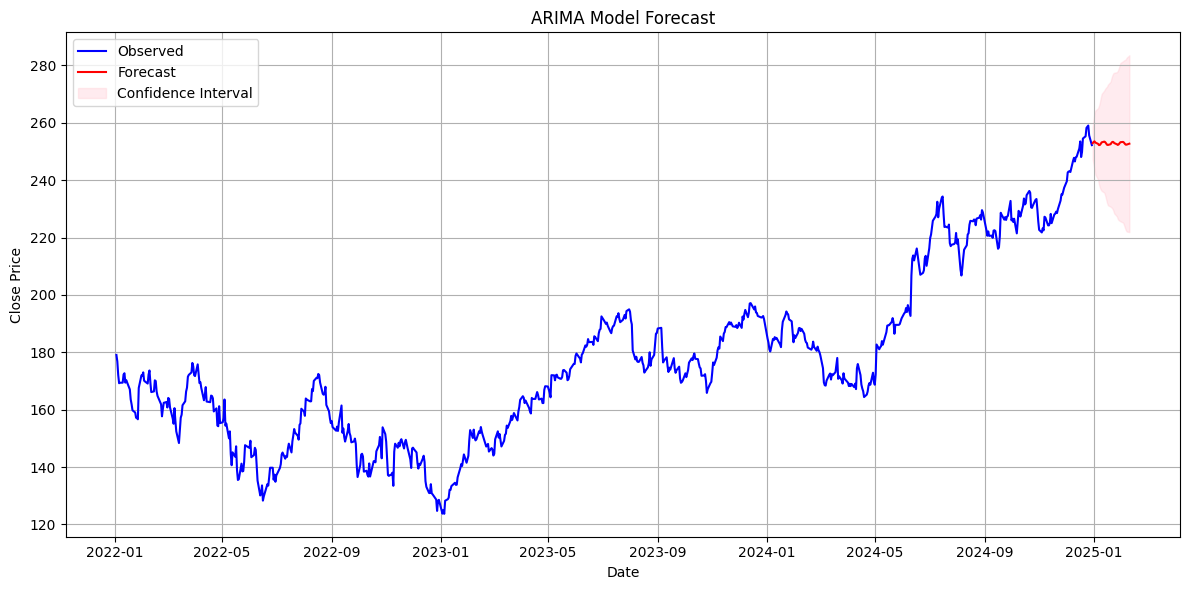

In [85]:

plt.figure(figsize=(12,6))
plt.plot(aapl_data.index, aapl_data['Close'], label ='Observed', color='blue')
plt.plot(forecast_index,forecast_mean, label='Forecast',color='red')
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Ensure that the predictions and actual values are aligned and converted to numpy arrays
actual_values = aapl_data['Close'][-len(predicted_data):].values
predicted_values = predicted_data.values

# Calculate errors
mae = mean_absolute_error(actual_values, predicted_values)
mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Normalize errors to percentage
mean_actual = np.mean(actual_values)  
mae_percentage = (mae / mean_actual) * 100
rmse_percentage = (rmse / mean_actual) * 100

# Calculate accuracy
accuracy = 100 - mape

# Print results in percentage
print(f"Mean Absolute Error (MAE): {mae_percentage:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.81%
Mean Absolute Percentage Error (MAPE): 0.81%
Root Mean Squared Error (RMSE): 1.00%
Model Accuracy: 99.19%
